In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors 
import pandas as pd
import scipy.stats
import math
import random
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sys
import seaborn as sns
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

%matplotlib inline

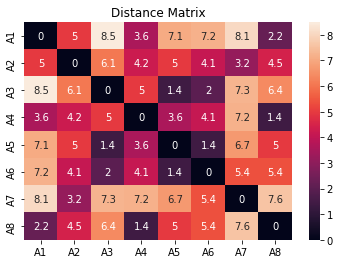

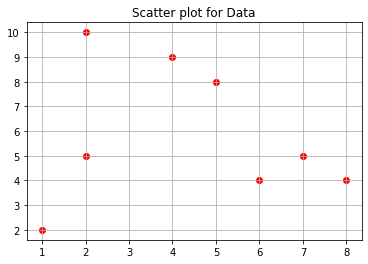

In [ ]:
# A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9).
X = [2,2,8,5,7,6,1,4]
Y = [10,5,4,8,5,4,2,9]


label = ["A"+str(i+1) for i in range(8)]
dist = [[0 for i in range(8)] for j in range(8)]
for i in range(8):
  for j in range(i):
    tempDist = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2 )
    dist[i][j] = dist[j][i] = tempDist 


sns.heatmap(dist, xticklabels = label , yticklabels = label,annot= True )
plt.title('Distance Matrix')
plt.show()
print()
X =np.array([X,Y])
X=np.transpose(X)
plt.scatter(X[:,0],X[:,1],c="r")
plt.title('Scatter plot for Data')
plt.grid()
plt.show()


In [ ]:
 
def kmeans_func(x_data,k, n_iter):
    # random_idx = np.random.choice(len(x_data ), k, replace=False)
    #Randomly allocate centroid points 
    # centroids = x_data[ random_idx, :] 
    centroids = [[2,10],[5,8],[1,2]]
    # print(centroids) 
    d_array = cdist(x_data, centroids ,'euclidean')
    ans = np.array([np.argmin(i) for i in d_array]) 
     
    for _ in range(n_iter): 
        centroids = []
        for random_idx in range(k): 
            temp = x_data[ans==random_idx].mean(axis=0) 
            centroids.append(temp)
 
        centroids = np.vstack(centroids)  
         
        d_array = cdist(x_data, centroids ,'euclidean')
        ans = np.array([np.argmin(i) for i in d_array])
    
    # scatter plot
    number_of_colors = k
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
    labels=[]
    for j in range(k):
      labels.append("cluster"+str(j+1))
    plt.figure(figsize=(10,6))
    
    for i in range(len(x_data)):
      plt.scatter(x_data[i][0],x_data[i][1],c=color[ans[i]])
    plt.scatter(centroids[:,0],centroids[:,1],s=300,c='yellow',label='Centroids')
    plt.legend(labels,loc="lower right")
    plt.title("Scatter plot with "+str(k)+" clusters")
    
    plt.grid()
    plt.show()

    print(centroids)

    # find error
    error=0
    for i in range(len(x_data)):
        min_val= sys.maxsize
        for j in range(k):
            temp = (x_data[i][0]-centroids[j][0])**2 + (x_data[i][1]-centroids[j][1])**2
            min_val = min(min_val,temp)
        error = error + min_val
    
    return ans,error

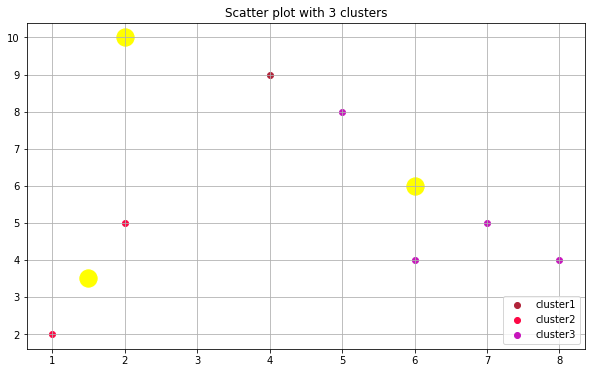

[[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]



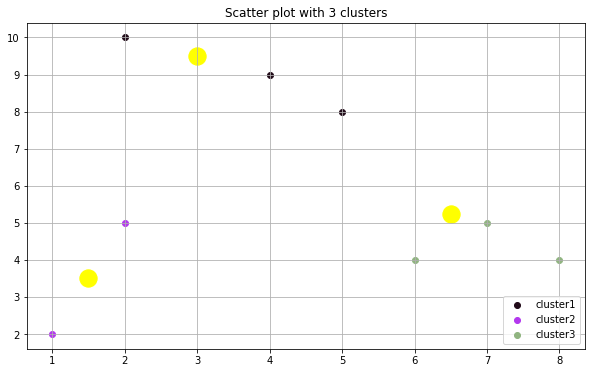

[[3.   9.5 ]
 [6.5  5.25]
 [1.5  3.5 ]]



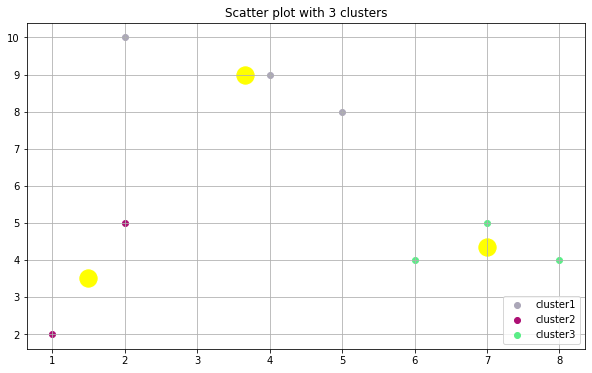

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



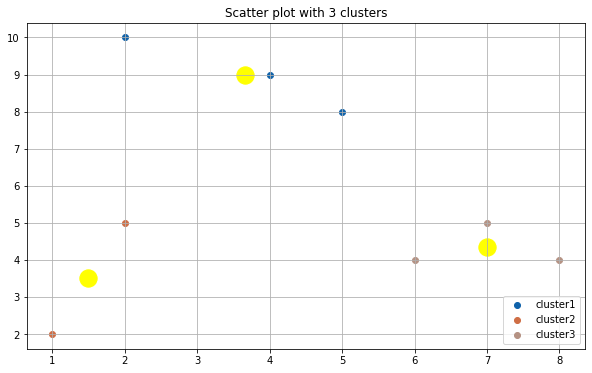

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



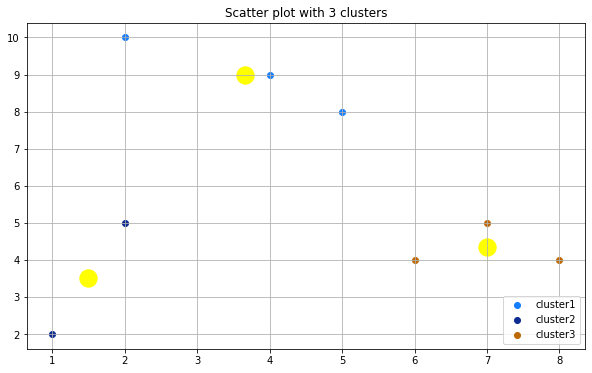

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



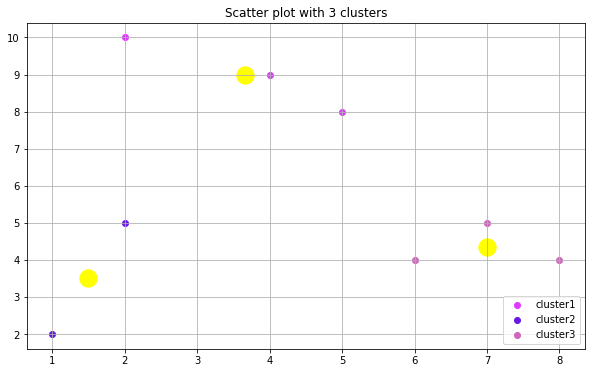

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



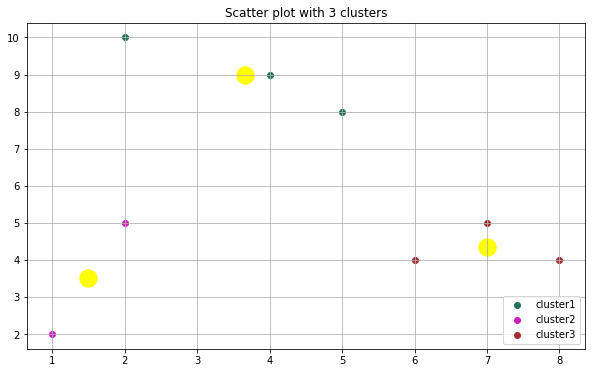

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



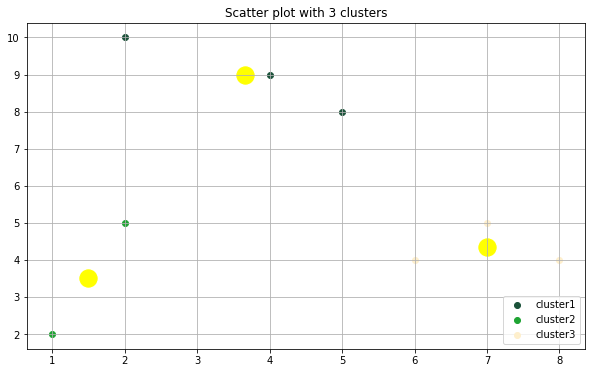

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



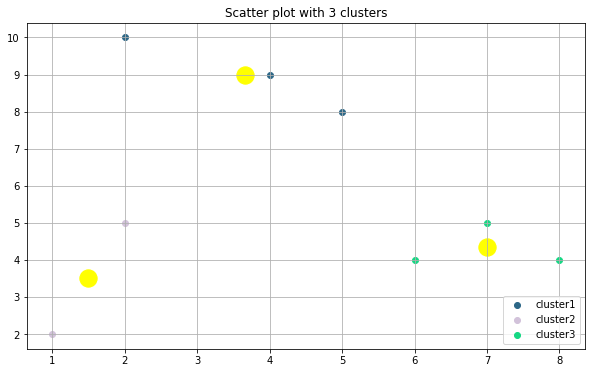

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



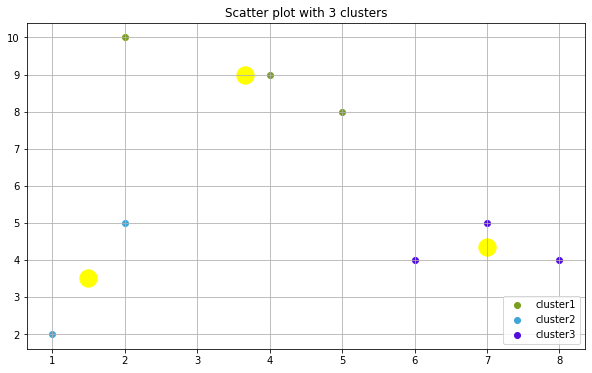

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]

[29.0, 19.6875, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332]


In [ ]:
sse_error=[]
for i in range(10):
  label,error = kmeans_func(X,3,i+1)
  sse_error.append(error) 
  print()
print(sse_error)

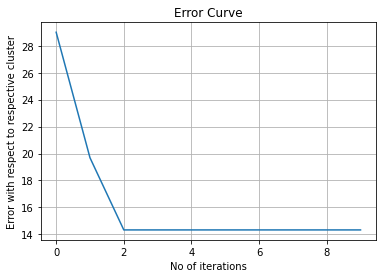

In [ ]:
plt.plot(sse_error)
plt.xlabel('No of iterations')
plt.ylabel('Error with respect to respective cluster')
plt.grid()
plt.title('Error Curve')
plt.show()
